## generate conflict matrix and visualize it

In [ ]:
import random
# List of first names and last names
first_names = ["Ali", "Zahra", "Reza", "Sara", "Mohammad", "Fatemeh", "Hossein", "Maryam", "Mehdi", "Narges", "Hamed", "Roya"]
last_names = ["Ahmadi", "Hosseini", "Karimi", "Rahimi", "Hashemi", "Ebrahimi", "Moradi", "Mohammadi", "Rostami", "Fazeli", "Hosseinzadeh", "Niknam"]

# Set a seed for reproducibility
random.seed(42)

# Generate 24 unique random names
random_names = set()
while len(random_names) < 24:
    first_name = random.choice(first_names)
    last_name = random.choice(last_names)
    random_names.add(f"{first_name} {last_name}")

random_names = list(random_names)  # Convert set to list
print(random_names)

# # Initialize a 24x24 matrix with zeros
# conflict_matrix_example = np.zeros((24, 24), dtype=int)

# # Randomly select 40 unique pairs for conflicts
# conflict_pairs = set()
# while len(conflict_pairs) < 40:
#     i = random.randint(0, 23)
#     j = random.randint(0, 23)
#     if i != j and (i, j) not in conflict_pairs:
#         conflict_pairs.add((i, j))

# # Assign conflicts to the matrix
# for i, j in conflict_pairs:
#     conflict_matrix_example[i, j] = 1

['Mohammad Ahmadi', 'Zahra Hosseini', 'Reza Niknam', 'Hossein Ebrahimi', 'Mehdi Hosseini', 'Roya Hosseini', 'Ali Niknam', 'Hossein Hosseini', 'Narges Moradi', 'Maryam Fazeli', 'Roya Rostami', 'Hamed Hosseini', 'Hamed Niknam', 'Narges Ahmadi', 'Mehdi Rahimi', 'Hossein Rahimi', 'Sara Karimi', 'Roya Hosseinzadeh', 'Ali Ahmadi', 'Sara Rostami', 'Mohammad Karimi', 'Mohammad Rahimi', 'Sara Ebrahimi', 'Zahra Rahimi']


In [ ]:
import numpy as np

def generate_conflict_matrix(num_people=24, num_conflicts=40):
    matrix = np.zeros((num_people, num_people))
    while np.sum(matrix) < 2 * num_conflicts:
        i, j = np.random.choice(num_people, 2, replace=False)
        if i != j and matrix[i, j] == 0:
            matrix[i, j] = 1
            matrix[j, i] = 1  # Ensure the matrix is symmetric
    return matrix

# Example usage
conflict_matrix = generate_conflict_matrix()
print(conflict_matrix)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 0. 1.

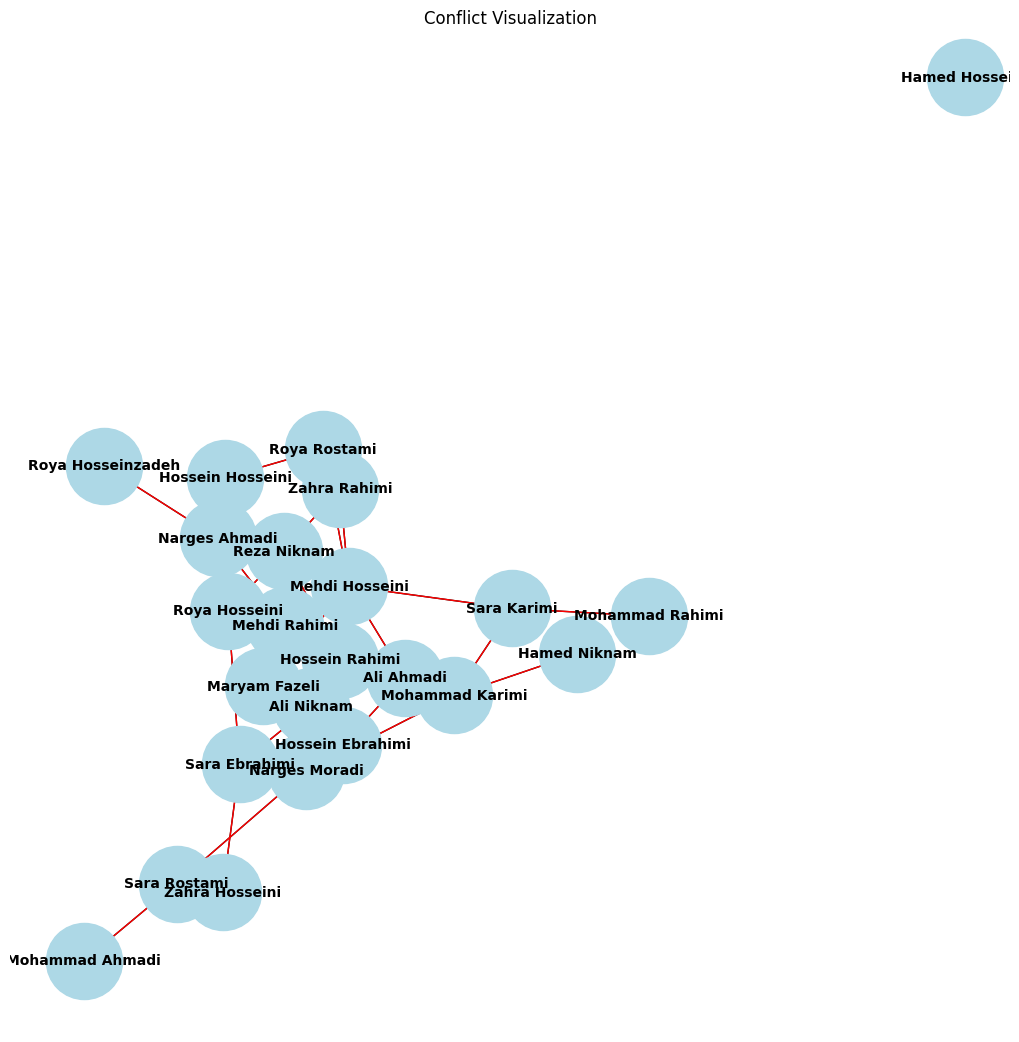

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_conflicts(people, conflict_matrix):
    if len(people) != len(conflict_matrix):
        raise ValueError("Length of people list must match the size of the conflict matrix.")

    # Create a graph
    G = nx.Graph()

    # Add nodes
    for person in people:
        G.add_node(person)

    # Add edges based on conflicts
    for i in range(len(conflict_matrix)):
        for j in range(i+1, len(conflict_matrix)):
            if conflict_matrix[i][j] == 1:
                G.add_edge(people[i], people[j])

    # Draw the graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edge_color='red')
    plt.title("Conflict Visualization")
    plt.show()

# Example usage
# people = [f"Person {i+1}" for i in range(24)]
people = random_names
visualize_conflicts(people, conflict_matrix)


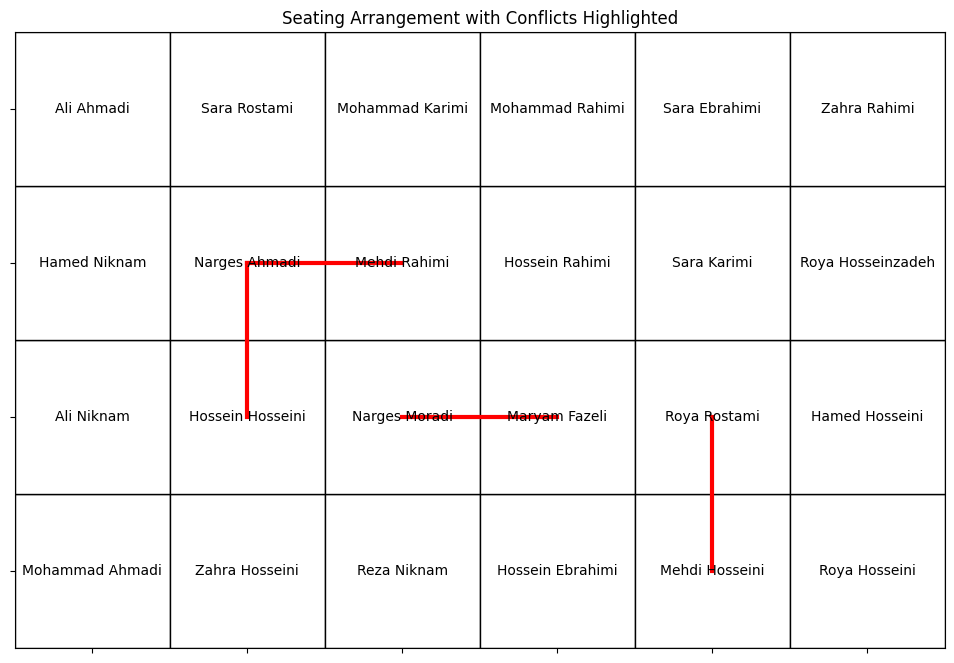

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_seating(people, placement_matrix, conflict_matrix):
    # Ensure the input matrices are valid
    if len(people) != 24 or placement_matrix.shape != (24, 24) or conflict_matrix.shape != (24, 24):
        raise ValueError("Invalid input sizes.")

    # Convert the placement matrix to a 1D array indicating the seat number for each person
    seating_order = np.argmax(placement_matrix, axis=1)

    # Create a 2D seating arrangement (4 rows x 6 columns)
    seating_arrangement = seating_order.reshape((4, 6))

    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the seating arrangement
    for row in range(4):
        for col in range(6):
            person_idx = seating_arrangement[row, col]
            person_name = people[person_idx]
            rect = patches.Rectangle((col, 3 - row), 1, 1, linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)
            plt.text(col + 0.5, 3 - row + 0.5, person_name, ha='center', va='center')

    # Check for conflicts in adjacent seats and highlight them
    for row in range(4):
        for col in range(6):
            person_idx = seating_arrangement[row, col]
            # Check right neighbor
            if col < 5:
                right_neighbor_idx = seating_arrangement[row, col + 1]
                if conflict_matrix[person_idx, right_neighbor_idx] == 1:
                    plt.plot([col + 0.5, col + 1.5], [3 - row + 0.5, 3 - row + 0.5], 'r-', lw=3)
            # Check bottom neighbor
            if row < 3:
                bottom_neighbor_idx = seating_arrangement[row + 1, col]
                if conflict_matrix[person_idx, bottom_neighbor_idx] == 1:
                    plt.plot([col + 0.5, col + 0.5], [3 - row + 0.5, 2 - row + 0.5], 'r-', lw=3)

    ax.set_xlim(0, 6)
    ax.set_ylim(0, 4)
    ax.set_xticks(np.arange(6) + 0.5)
    ax.set_yticks(np.arange(4) + 0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.gca().invert_yaxis()
    plt.title("Seating Arrangement with Conflicts Highlighted")
    plt.show()

# Example usage
# people = [f"Person {i+1}" for i in range(24)]
placement_matrix = np.eye(24)  # Identity matrix for example
# conflict_matrix = generate_conflict_matrix()

visualize_seating(people, placement_matrix, conflict_matrix)


## loss function

In [ ]:
import torch
import torch.nn.functional as F

def compute_loss(P_hat, conflict_matrix):
    """
    Compute the loss for the given placement matrix and conflict matrix.

    Parameters:
    - P_hat: The predicted placement matrix (batch_size, 24, 24)
    - conflict_matrix: The conflict matrix (batch_size, 24, 24)

    Returns:
    - loss: The computed loss value
    """
    batch_size = P_hat.size(0)
    n = P_hat.size(1)  # This should be 24

    # Assignment loss
    row_sum_loss = F.mse_loss(torch.sum(P_hat, dim=2), torch.ones(batch_size, n, device=P_hat.device))
    col_sum_loss = F.mse_loss(torch.sum(P_hat, dim=1), torch.ones(batch_size, n, device=P_hat.device))
    assignment_loss = row_sum_loss + col_sum_loss

    # Conflict loss
    conflict_loss = 0
    for b in range(batch_size):
        P = P_hat[b]
        P_t = P.transpose(0, 1)
        C = torch.matmul(torch.matmul(P, conflict_matrix[b].float()), P_t)

        for i in range(4):
            for j in range(6):
                current_index = i * 6 + j
                if j < 5:  # Right neighbor
                    right_index = i * 6 + (j + 1)
                    conflict_loss += C[current_index, right_index]
                if i < 3:  # Front neighbor
                    front_index = (i + 1) * 6 + j
                    conflict_loss += C[current_index, front_index]
                if j > 0:  # Left neighbor
                    left_index = i * 6 + (j - 1)
                    conflict_loss += C[current_index, left_index]
                if i > 0:  # Back neighbor
                    back_index = (i - 1) * 6 + j
                    conflict_loss += C[current_index, back_index]

    total_loss = assignment_loss*100 + conflict_loss
    return total_loss

# Example usage
P_hat = torch.eye(24).unsqueeze(0).repeat(10, 1, 1)  # Example batch of identity matrices
conflict_matrices = torch.from_numpy(conflict_matrix).unsqueeze(0).repeat(10, 1, 1)  # Example batch of conflict matrices

loss = compute_loss(P_hat, conflict_matrices)
print("Loss:", loss.item())


Loss: 80.0


Epoch 0, Loss: 10.651562595367432
Epoch 1, Loss: 10.631283569335938
Epoch 2, Loss: 10.657935237884521
Epoch 3, Loss: 10.652669620513915
Epoch 4, Loss: 10.574435043334962
Epoch 5, Loss: 10.562323760986327
Epoch 6, Loss: 10.583086204528808
Epoch 7, Loss: 10.564039039611817
Epoch 8, Loss: 10.530160427093506
Epoch 9, Loss: 10.536749839782715
Epoch 10, Loss: 10.549629974365235
Epoch 11, Loss: 10.531897068023682
Epoch 12, Loss: 10.535636234283448
Epoch 13, Loss: 10.5381254196167
Epoch 14, Loss: 10.52373743057251
Epoch 15, Loss: 10.543769359588623
Epoch 16, Loss: 10.520911407470702
Epoch 17, Loss: 10.521985149383545
Epoch 18, Loss: 10.527197742462159
Epoch 19, Loss: 10.548572540283203
Epoch 20, Loss: 10.504229927062989
Epoch 21, Loss: 10.477778434753418
Epoch 22, Loss: 10.520428466796876
Epoch 23, Loss: 10.499536609649658
Epoch 24, Loss: 10.509132957458496
Epoch 25, Loss: 10.50313138961792
Epoch 26, Loss: 10.517985534667968
Epoch 27, Loss: 10.49952802658081
Epoch 28, Loss: 10.524134826660156


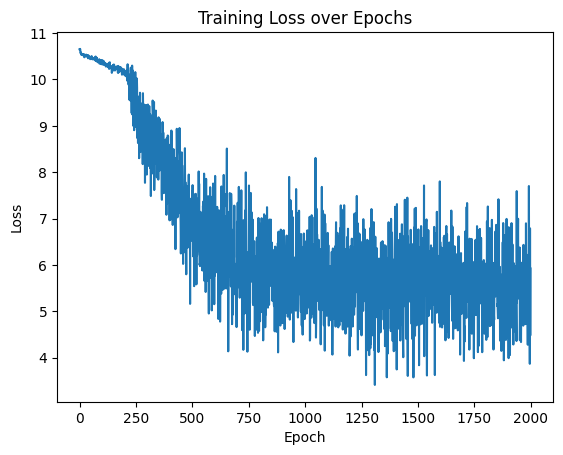

In [ ]:
import torch.optim as optim

# Define your neural network model (for example purposes, a simple MLP)
class PlacementNet(torch.nn.Module):
    def __init__(self):
        super(PlacementNet, self).__init__()
        self.fc1 = torch.nn.Linear(24*24, 512)
        self.fc2 = torch.nn.Linear(512, 24*24)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.view(-1, 24, 24)
        return F.softmax(x, dim=-1)

# Initialize the model, optimizer, and loss function
model = PlacementNet().to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2000
batch_size = 10
losses = []

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(batch_size):
        conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
        optimizer.zero_grad()
        P_hat = model(conflict_matrices.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrices)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / batch_size
    losses.append(avg_loss)

    print(f"Epoch {epoch}, Loss: {avg_loss}")

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


In [ ]:
import torch
import numpy as np

# Assuming generate_conflict_matrix, PlacementNet, and the trained model are defined

def generate_placement(model, conflict_matrix):
    """
    Generate a seating arrangement from the model given a conflict matrix.

    Parameters:
    - model: The trained neural network model
    - conflict_matrix: The conflict matrix (24x24)

    Returns:
    - placement: A list of 24 integers representing the seating arrangement
    """
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        conflict_matrix_tensor = torch.from_numpy(conflict_matrix).float().unsqueeze(0).to('cuda')
        P_hat = model(conflict_matrix_tensor.view(1, -1))  # Forward pass
        P_hat = P_hat.squeeze(0)  # Remove the batch dimension

    # Convert the placement matrix P_hat to a list of integers (indices)
    placement = torch.argmax(P_hat, dim=1).cpu().numpy().tolist()
    return placement

# Example usage
conflict_matrix = generate_conflict_matrix()  # Generate or provide a conflict matrix
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)


Generated Placement: [21, 8, 14, 11, 19, 12, 23, 9, 2, 13, 15, 3, 7, 1, 5, 22, 0, 10, 6, 16, 20, 18, 17, 4]


## test the code on a conflict matrix

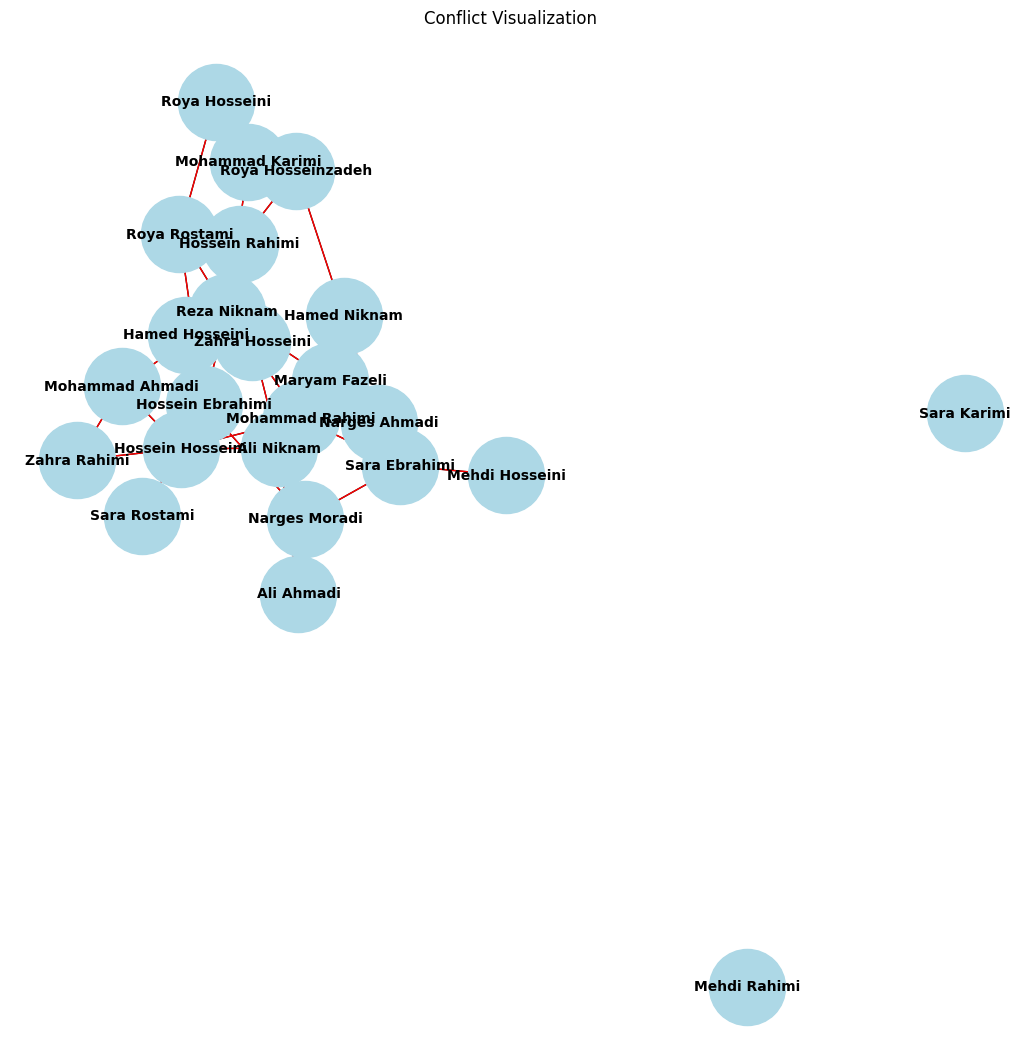

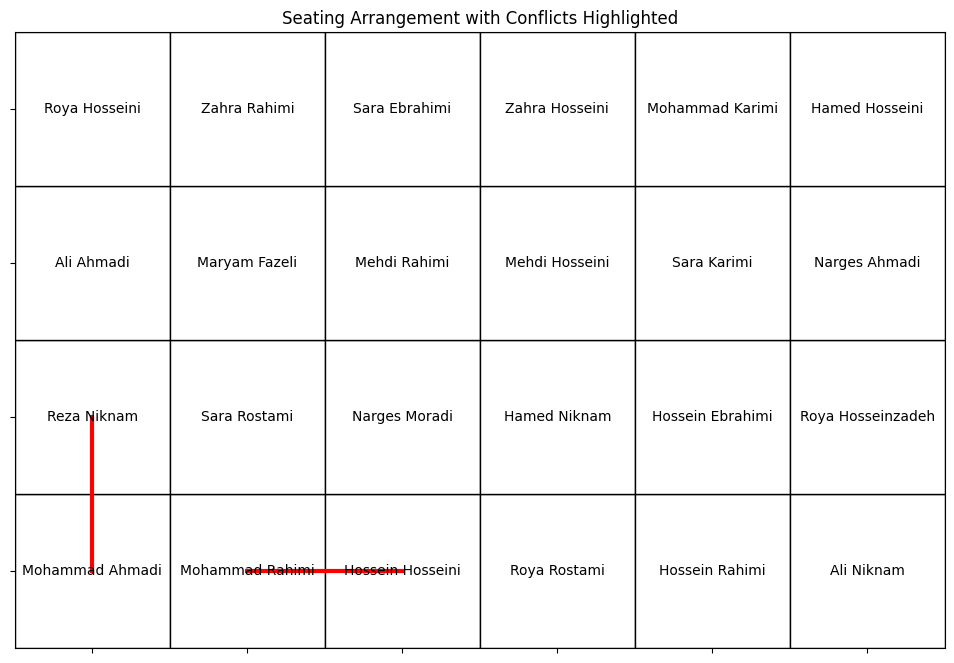

In [ ]:
# generate a conflict matrix and visualize it
def generate_and_visualize_placement(conflict_matrix, people, model):
  visualize_conflicts(people, conflict_matrix)
  model.eval()  # Set the model to evaluation mode
  with torch.no_grad():  # Disable gradient calculation
        conflict_matrix_tensor = torch.from_numpy(conflict_matrix).float().unsqueeze(0).to('cuda')
        P_hat = model(conflict_matrix_tensor.view(1, -1))  # Forward pass
        P_hat = P_hat.squeeze(0)  # Remove the batch dimension
  visualize_seating(people, P_hat.cpu(), conflict_matrix)


conflict_matrix = generate_conflict_matrix()
generate_and_visualize_placement(conflict_matrix, people, model)

we still have 2 conflicts! now we should test a more complex model!

## more complex architecture

Epoch 0, Loss: 10.57240171432495
Epoch 1, Loss: 10.57307834625244
Epoch 2, Loss: 10.567975902557373
Epoch 3, Loss: 10.567551040649414
Epoch 4, Loss: 10.558561420440673
Epoch 5, Loss: 10.567051696777344
Epoch 6, Loss: 10.552602291107178
Epoch 7, Loss: 10.561249256134033
Epoch 8, Loss: 10.551755142211913
Epoch 9, Loss: 10.547267246246339
Epoch 10, Loss: 10.560022258758545
Epoch 11, Loss: 10.551673793792725
Epoch 12, Loss: 10.553578853607178
Epoch 13, Loss: 10.550463390350341
Epoch 14, Loss: 10.54429292678833
Epoch 15, Loss: 10.540408420562745
Epoch 16, Loss: 10.56360559463501
Epoch 17, Loss: 10.559159660339356
Epoch 18, Loss: 10.55647029876709
Epoch 19, Loss: 10.536819458007812
Epoch 20, Loss: 10.54504461288452
Epoch 21, Loss: 10.552170753479004
Epoch 22, Loss: 10.549653625488281
Epoch 23, Loss: 10.528122901916504
Epoch 24, Loss: 10.550165271759033
Epoch 25, Loss: 10.5367919921875
Epoch 26, Loss: 10.551621532440185
Epoch 27, Loss: 10.536015129089355
Epoch 28, Loss: 10.541387939453125
Epo

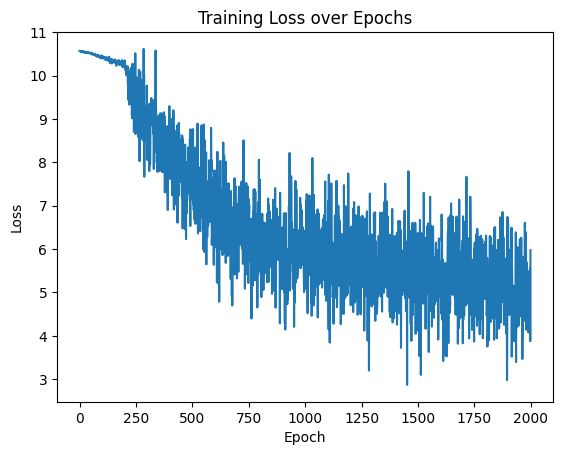

Generated Placement: [1, 4, 19, 12, 20, 2, 9, 11, 7, 10, 0, 18, 22, 17, 13, 5, 21, 15, 17, 16, 23, 8, 3, 14]


In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Define a deeper neural network model
class PlacementNet(torch.nn.Module):
    def __init__(self):
        super(PlacementNet, self).__init__()
        self.fc1 = torch.nn.Linear(24*24, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
        self.fc3 = torch.nn.Linear(512, 24*24)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.3)  # Adding dropout for regularization
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 24, 24)
        return F.softmax(x, dim=-1)


# Initialize the model, optimizer, and loss function
model = PlacementNet().to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced learning rate

# Training loop
num_epochs = 2000
batch_size = 10
losses = []

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(batch_size):
        conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
        optimizer.zero_grad()
        P_hat = model(conflict_matrices.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrices)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / batch_size
    losses.append(avg_loss)
    print(f"Epoch {epoch}, Loss: {avg_loss}")

    # Early stopping criteria
    if epoch > 100 and avg_loss > losses[-1]:
        print("Early stopping")
        break

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


# Example usage
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)


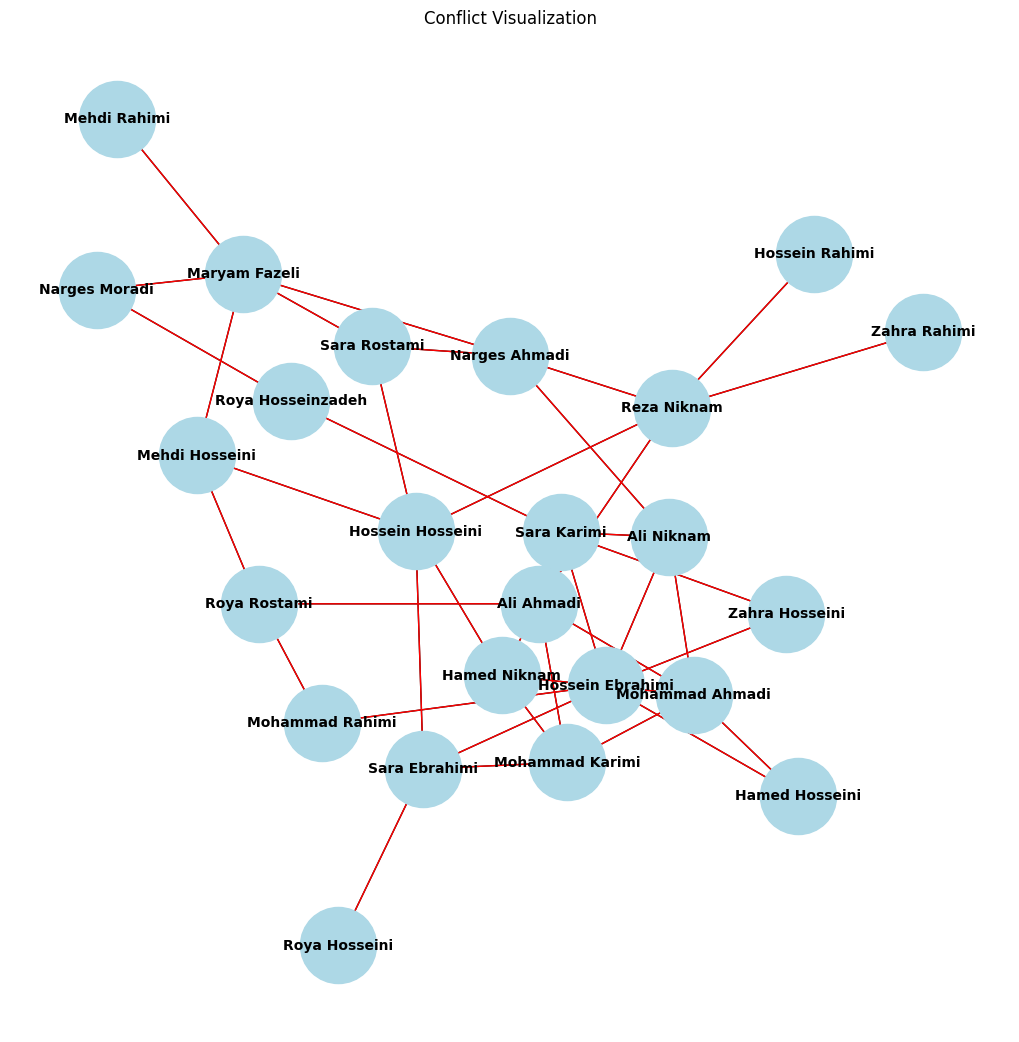

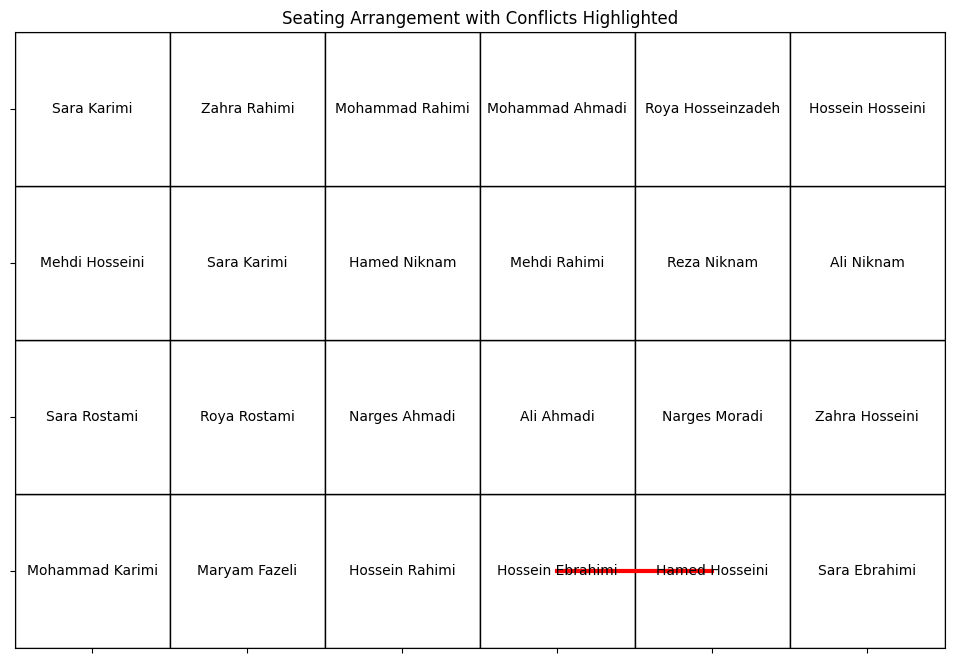

In [ ]:
conflict_matrix = generate_conflict_matrix()
generate_and_visualize_placement(conflict_matrix, people, model)

In [ ]:
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)

Generated Placement: [4, 1, 19, 12, 0, 20, 9, 11, 10, 7, 2, 18, 22, 17, 13, 5, 21, 15, 22, 16, 23, 8, 3, 14]


Generated Placement: [4, 1, 19, 12, 12, 2, 6, 11, 7, 10, 20, 18, 22, 11, 13, 8, 21, 15, 17, 16, 23, 5, 14, 3]


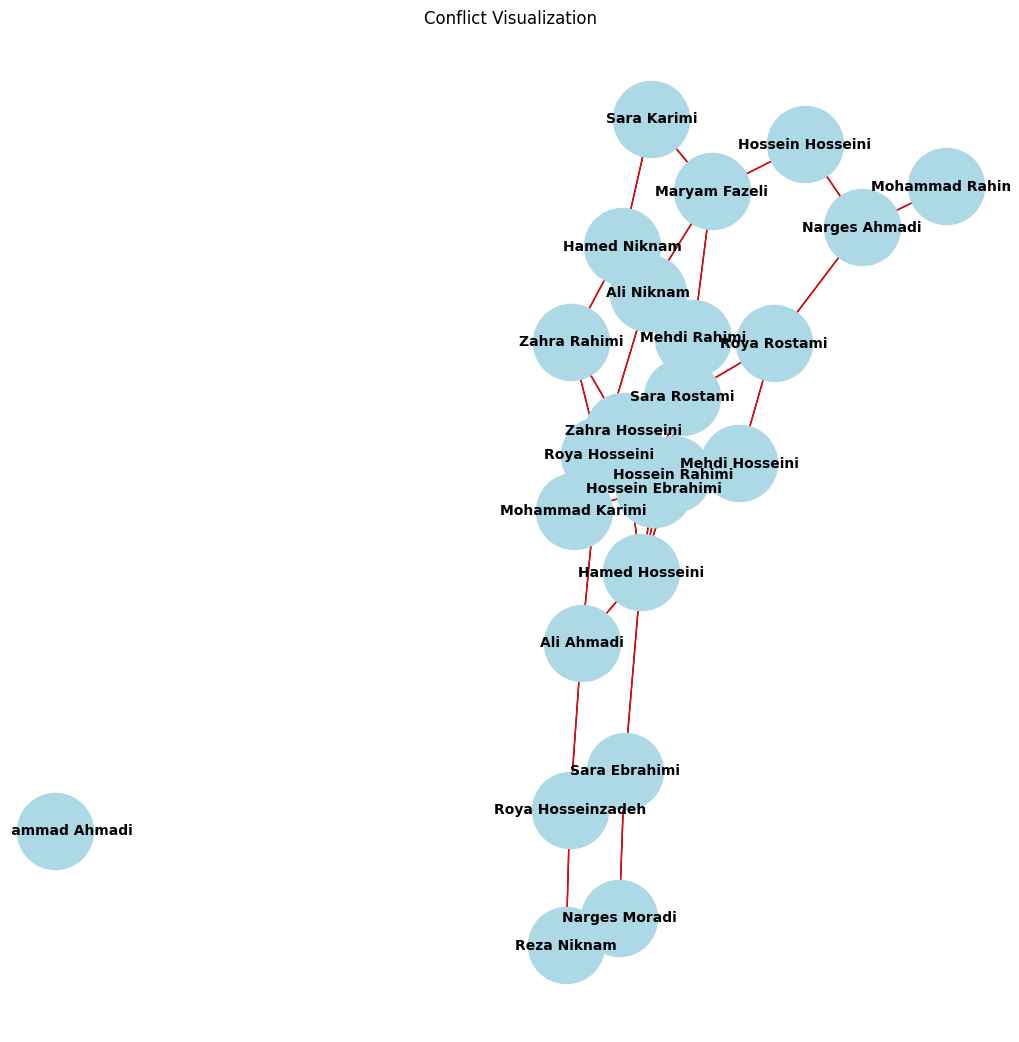

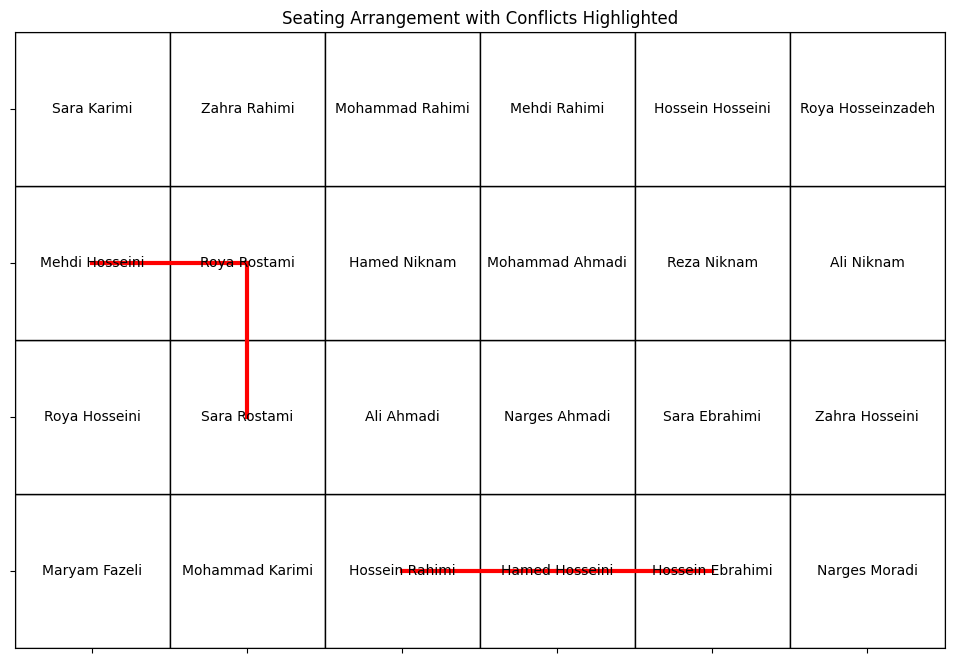

In [ ]:
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [4, 1, 19, 12, 20, 2, 6, 11, 7, 10, 0, 18, 22, 9, 13, 8, 21, 15, 17, 16, 5, 23, 3, 3]


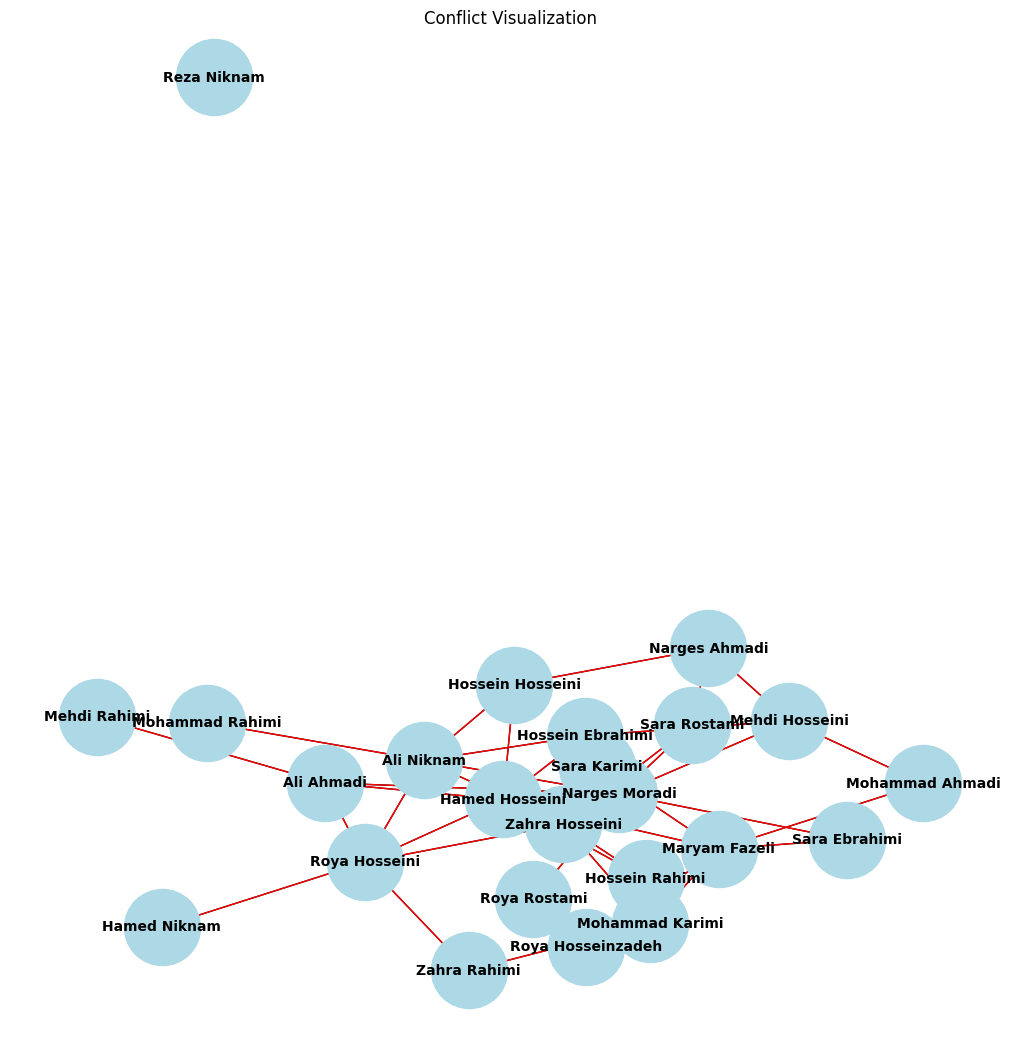

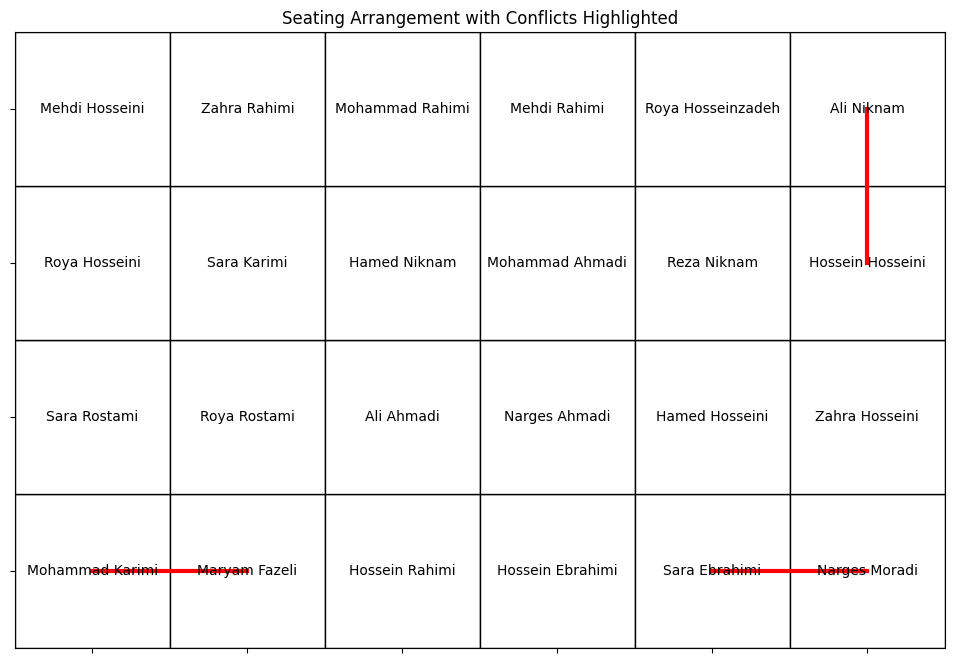

In [ ]:
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [1, 4, 19, 0, 12, 20, 6, 11, 10, 7, 2, 18, 22, 9, 13, 8, 21, 15, 17, 16, 23, 5, 14, 3]


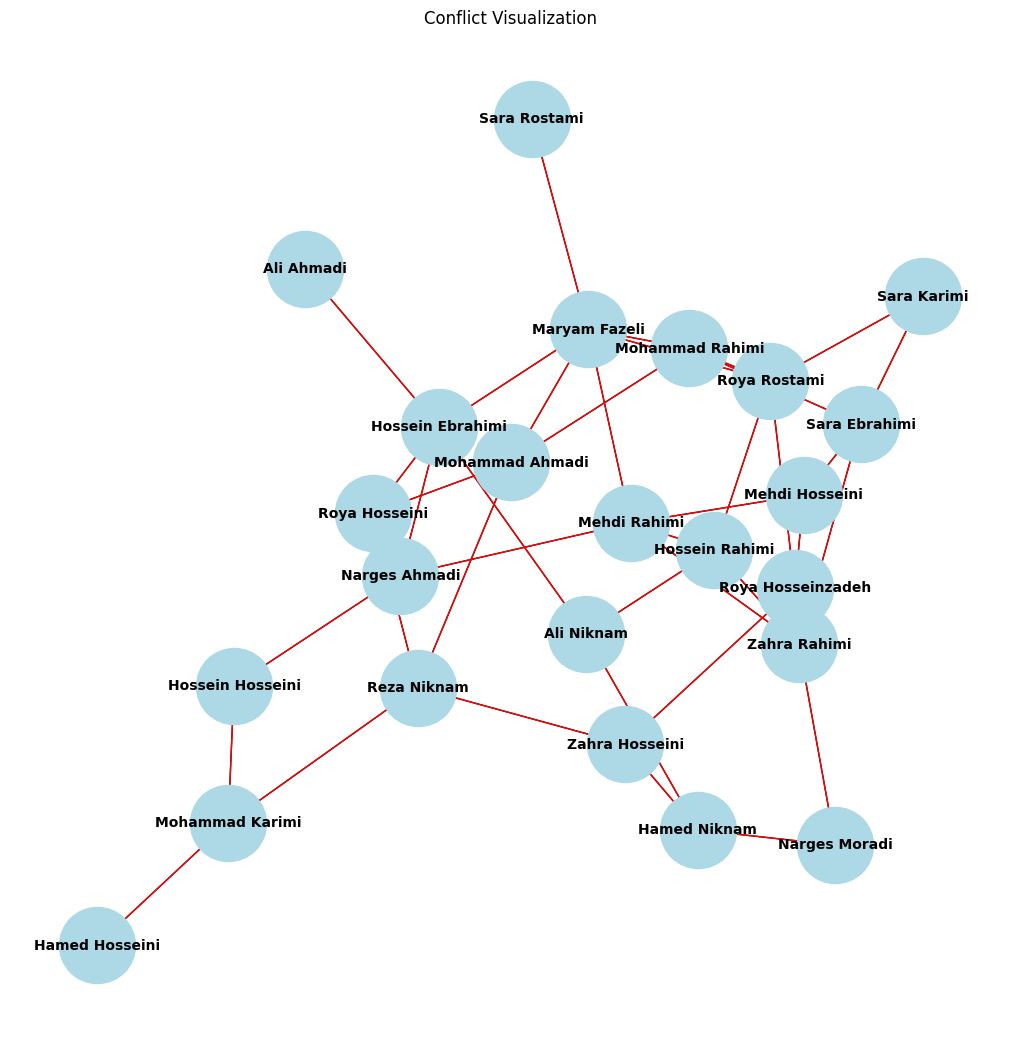

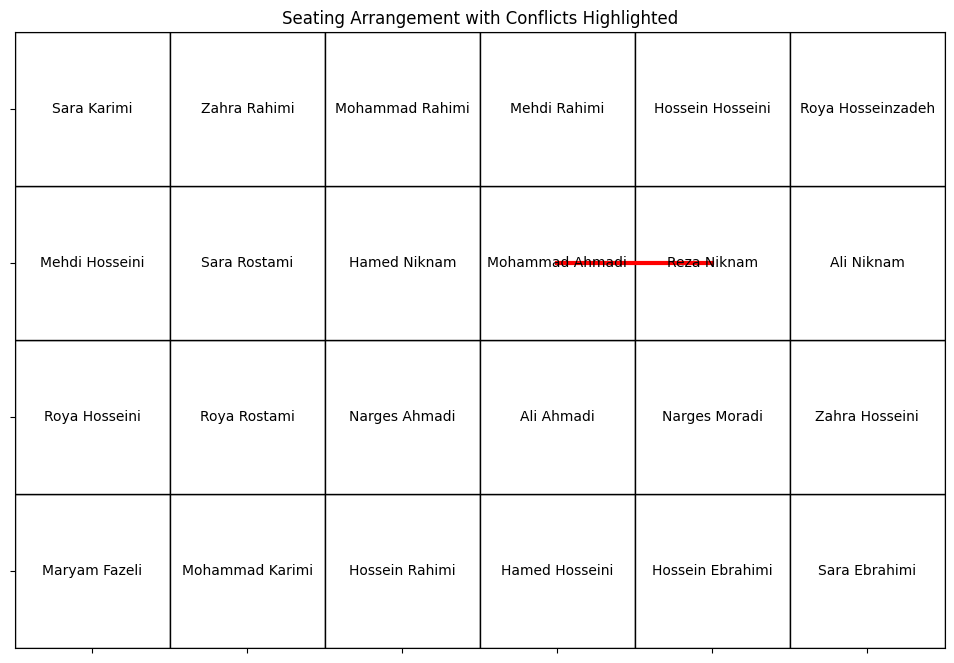

In [ ]:
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

the fluctuation was result of generating a new conflict matrix in each round. so we save 1000 conflict matrices and run 1000 epochs on them instead of generating new matrices in each epoch.

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Define a deeper neural network model
class PlacementNet(torch.nn.Module):
    def __init__(self):
        super(PlacementNet, self).__init__()
        self.fc1 = torch.nn.Linear(24*24, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
        self.fc3 = torch.nn.Linear(512, 24*24)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.3)  # Adding dropout for regularization
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 24, 24)
        return F.softmax(x, dim=-1)


# Initialize the model, optimizer, and loss function
model = PlacementNet().to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced learning rate

# Training loop
num_epochs = 1000
batch_size = 10
losses = []
conflict_matrices = [torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0) for i in range(1000)]

for epoch in range(num_epochs):
    total_loss = 0
    # conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
    for i, conflict_matrix in enumerate(conflict_matrices):
        conflict_matrix = conflict_matrix.to('cuda')
        # conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
        optimizer.zero_grad()
        P_hat = model(conflict_matrix.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrix)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(conflict_matrices)
    losses.append(avg_loss)
    print(f"Epoch {epoch}, Loss: {avg_loss}")

    # Early stopping criteria
    if epoch > 100 and avg_loss > losses[-1]:
        print("Early stopping")
        break

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


# Example usage
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)


Epoch 0, Loss: 10.503505554199219
Epoch 1, Loss: 10.29327860546112
Epoch 2, Loss: 9.137296712636948
Epoch 3, Loss: 8.067016107559205
Epoch 4, Loss: 7.187476947784424
Epoch 5, Loss: 6.403163830399513
Epoch 6, Loss: 5.7025289773345
Epoch 7, Loss: 5.245441754192114
Epoch 8, Loss: 4.944399808764458
Epoch 9, Loss: 4.713257459737361
Epoch 10, Loss: 4.559455845192074
Epoch 11, Loss: 4.433367032691836
Epoch 12, Loss: 4.3389199062511326
Epoch 13, Loss: 4.220148027267307
Epoch 14, Loss: 4.155817909657955
Epoch 15, Loss: 4.078024471625685
Epoch 16, Loss: 3.992415445622057
Epoch 17, Loss: 3.93408405360207
Epoch 18, Loss: 3.8887599440328775
Epoch 19, Loss: 3.824731146156788
Epoch 20, Loss: 3.7570860365536065
Epoch 21, Loss: 3.6985064383149147
Epoch 22, Loss: 3.628487029660493
Epoch 23, Loss: 3.573337709452957
Epoch 24, Loss: 3.538719941167161
Epoch 25, Loss: 3.4885309402085842
Epoch 26, Loss: 3.4300123254968784
Epoch 27, Loss: 3.397382534278091
Epoch 28, Loss: 3.3606899889521302
Epoch 29, Loss: 3.3

KeyboardInterrupt: 

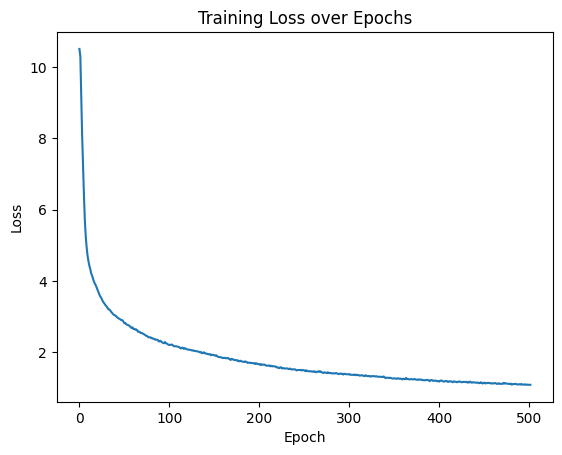

Generated Placement: [13, 6, 6, 2, 23, 15, 0, 21, 3, 19, 22, 20, 18, 17, 9, 4, 14, 16, 8, 7, 1, 5, 10, 11]


In [ ]:
# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()


# Example usage
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)

In [ ]:
# loss on test data (it is better to have unique matrices in test that are different from training data for more accurate results but we ignore this part for now)
conflict_matrices_test = [torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0) for i in range(400)]
model.eval()
with torch.no_grad():
  total_loss = 0
  for i, conflict_matrix in enumerate(conflict_matrices_test):
        conflict_matrix = conflict_matrix.to('cuda')
        P_hat = model(conflict_matrix.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrix)
        total_loss += loss.item()
  avg_test_loss = total_loss / len(conflict_matrices_test)
  print(f"average test loss:{avg_test_loss}")

average test loss:7.650590611090884


Generated Placement: [13, 12, 6, 2, 15, 20, 5, 21, 3, 2, 22, 23, 18, 17, 9, 14, 4, 16, 8, 10, 1, 0, 11, 7]


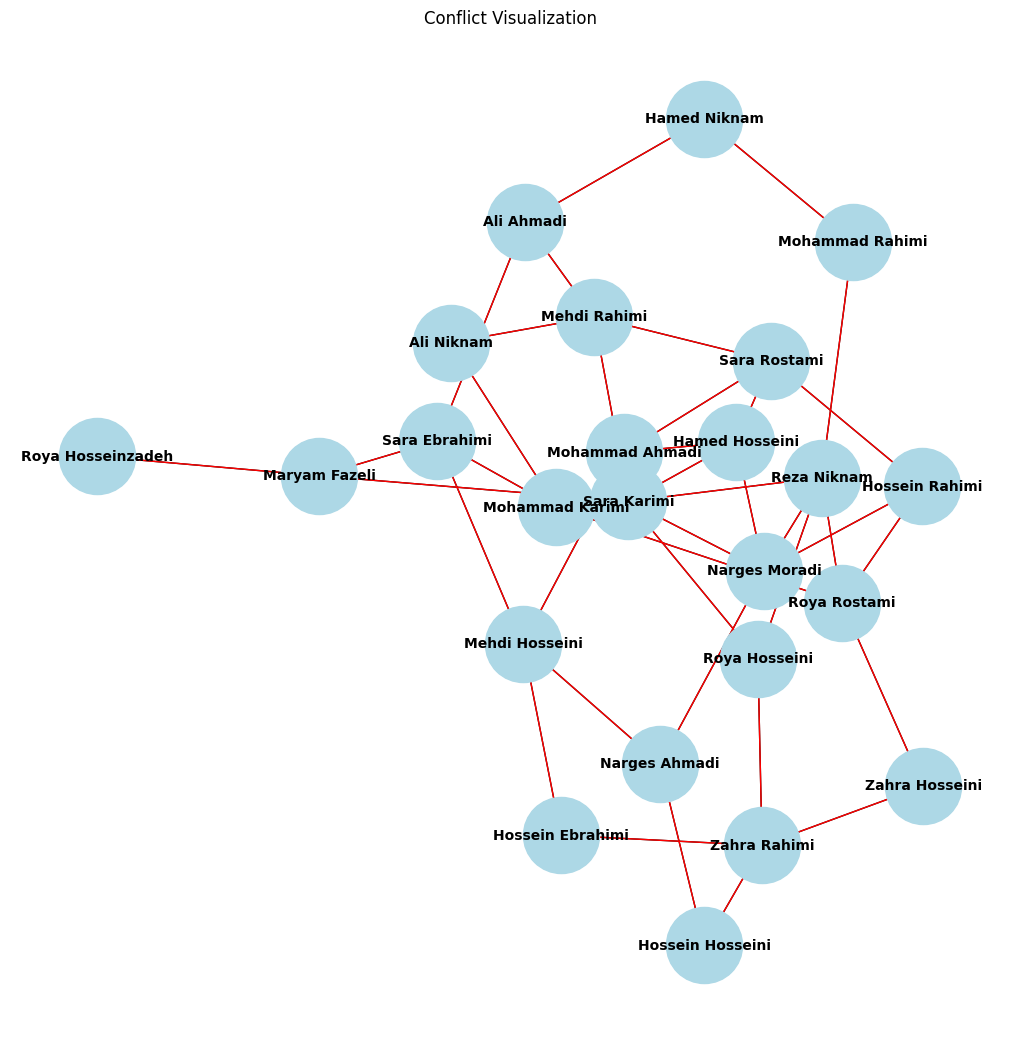

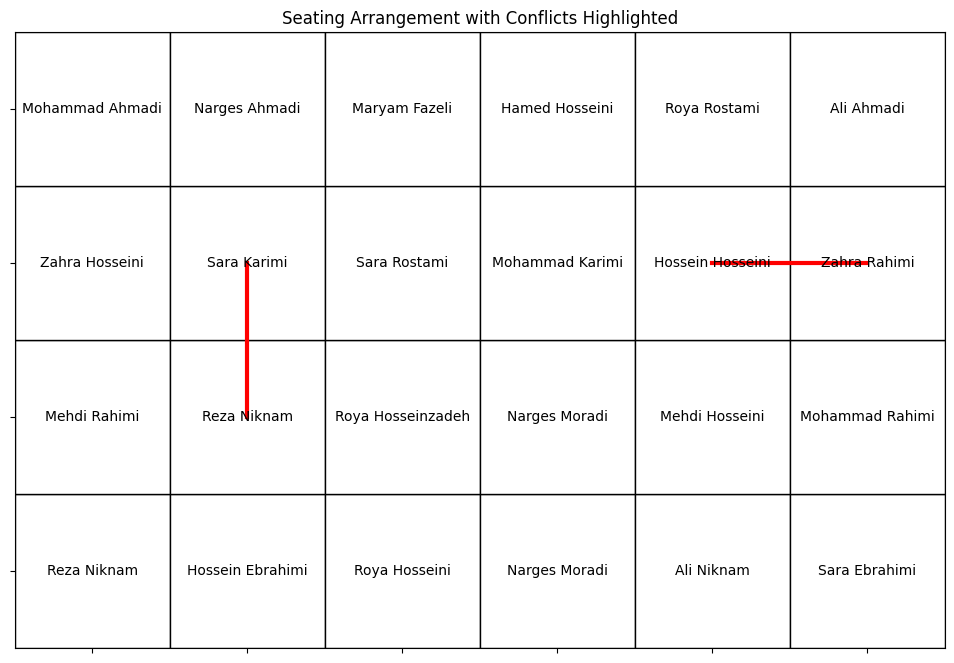

In [ ]:
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [21, 6, 12, 19, 15, 23, 18, 21, 3, 19, 22, 20, 0, 17, 1, 4, 14, 11, 10, 8, 9, 5, 7, 16]


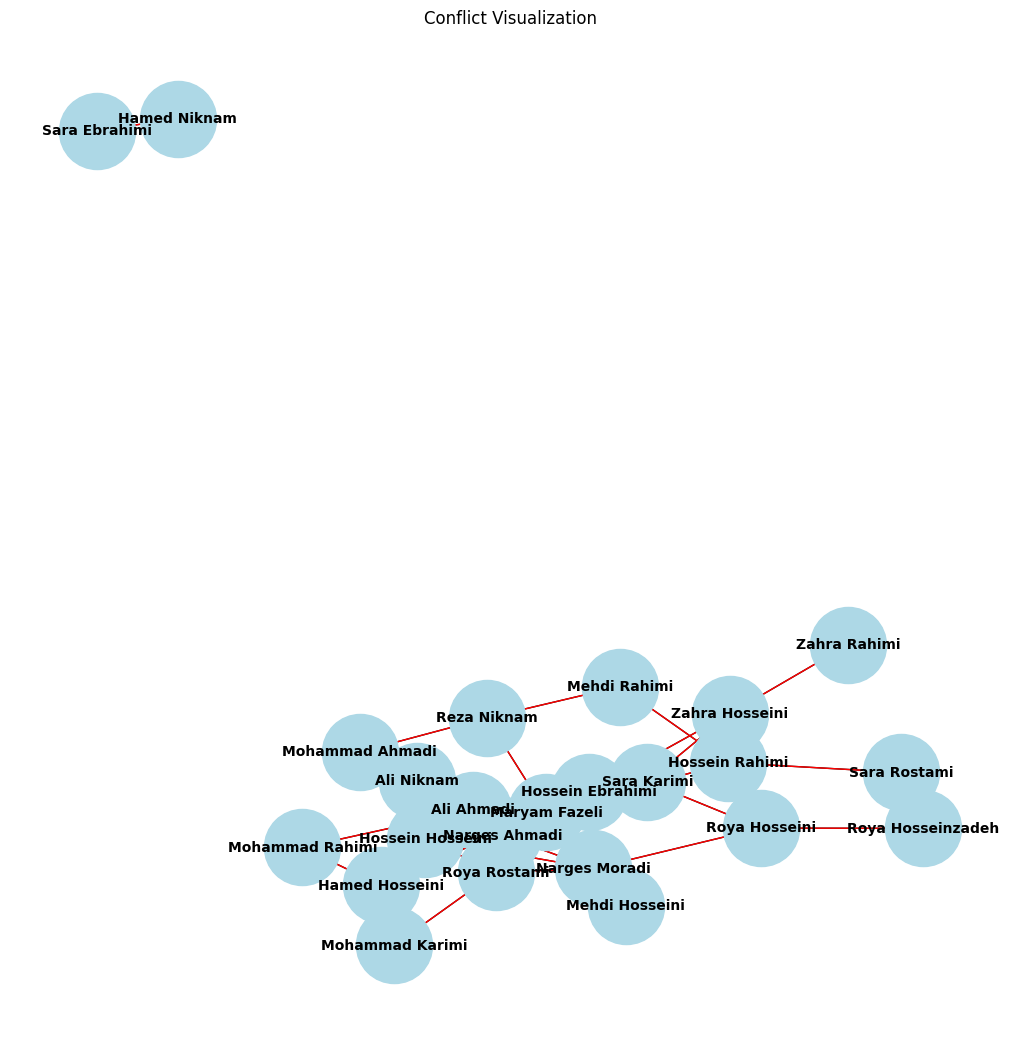

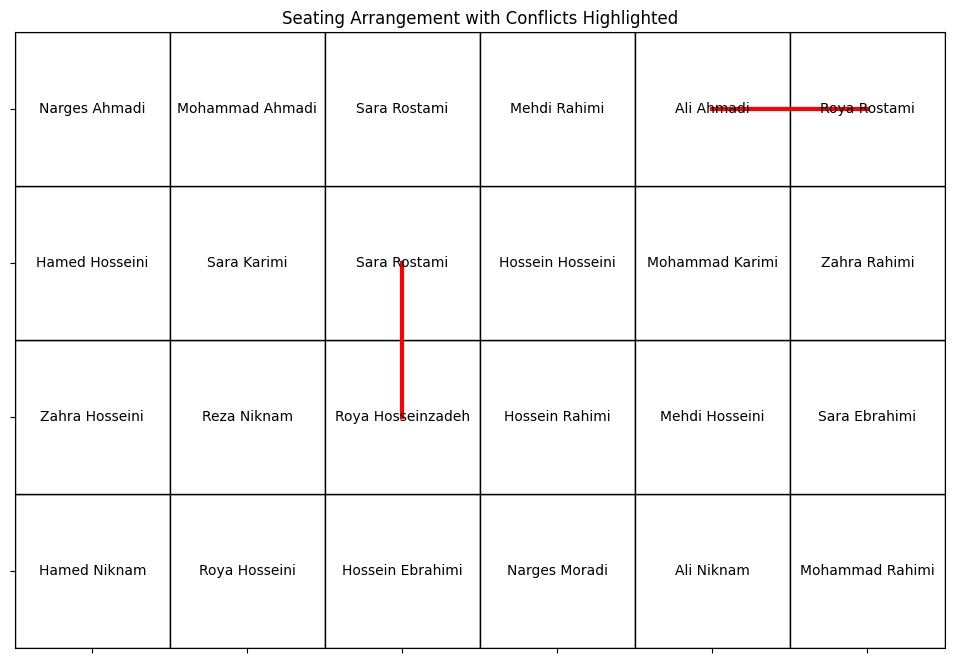

In [ ]:
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

# change number of training data and record the test loss every 10 epoch

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Define a deeper neural network model
class PlacementNet(torch.nn.Module):
    def __init__(self):
        super(PlacementNet, self).__init__()
        self.fc1 = torch.nn.Linear(24*24, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
        self.fc3 = torch.nn.Linear(512, 24*24)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.3)  # Adding dropout for regularization
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 24, 24)
        return F.softmax(x, dim=-1)


# Initialize the model, optimizer, and loss function
model = PlacementNet().to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced learning rate

# Training loop
num_epochs = 300
batch_size = 10
losses = []
test_losses = []
conflict_matrices = [torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0) for i in range(2000)]
conflict_matrices_test = [torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0) for i in range(400)]

for epoch in range(num_epochs):
    total_loss = 0
    # conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
    for i, conflict_matrix in enumerate(conflict_matrices):
        conflict_matrix = conflict_matrix.to('cuda')
        # conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
        optimizer.zero_grad()
        P_hat = model(conflict_matrix.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrix)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(conflict_matrices)
    losses.append(avg_loss)



    with torch.no_grad():
      total_loss_test = 0
      for i, conflict_matrix in enumerate(conflict_matrices_test):
        conflict_matrix = conflict_matrix.to('cuda')
        P_hat = model(conflict_matrix.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrix)
        total_loss_test += loss.item()
    avg_test_loss = total_loss_test / len(conflict_matrices_test)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch}, Loss: {avg_loss}, Validation Loss: {avg_test_loss}")

    # Early stopping criteria
    if epoch > 100 and avg_loss > losses[-1]:
        print("Early stopping")
        break

# Plot the training loss
plt.plot(losses)
plt.plot(test_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.show()


# Example usage
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)


Epoch 0, Loss: 10.419503052711487, Validation Loss: 10.245080528259278
Epoch 1, Loss: 9.028433560490608, Validation Loss: 8.44674184858799
Epoch 2, Loss: 7.519723062396049, Validation Loss: 7.270914364606142
Epoch 3, Loss: 6.531295572787523, Validation Loss: 6.596749106347561
Epoch 4, Loss: 5.93807663410157, Validation Loss: 6.299178713746369
Epoch 5, Loss: 5.581605065405369, Validation Loss: 6.045756777785718
Epoch 6, Loss: 5.321541917808354, Validation Loss: 5.974944312535226
Epoch 7, Loss: 5.116193796396256, Validation Loss: 5.965142177790403
Epoch 8, Loss: 4.939705267963931, Validation Loss: 5.897129242196679
Epoch 9, Loss: 4.794054086983204, Validation Loss: 5.8824306643009185
Epoch 10, Loss: 4.677904201583937, Validation Loss: 5.890098699107766
Epoch 11, Loss: 4.551605252180249, Validation Loss: 5.822069896711037
Epoch 12, Loss: 4.456040205265396, Validation Loss: 5.76765109244734
Epoch 13, Loss: 4.3424813648443665, Validation Loss: 5.747660218700767
Epoch 14, Loss: 4.27974201210

KeyboardInterrupt: 

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Define a deeper neural network model
class PlacementNet(torch.nn.Module):
    def __init__(self):
        super(PlacementNet, self).__init__()
        self.fc1 = torch.nn.Linear(24*24, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
        self.fc3 = torch.nn.Linear(512, 24*24)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.3)  # Adding dropout for regularization
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 24, 24)
        return F.softmax(x, dim=-1)


# Initialize the model, optimizer, and loss function
model = PlacementNet().to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Reduced learning rate

# Training loop
num_epochs = 700
batch_size = 10
losses = []
test_losses = []
conflict_matrices = [torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0) for i in range(2000)]
conflict_matrices_test = [torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0) for i in range(400)]

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    # conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
    for i, conflict_matrix in enumerate(conflict_matrices):
        conflict_matrix = conflict_matrix.to('cuda')
        # conflict_matrices = torch.from_numpy(generate_conflict_matrix()).float().unsqueeze(0).to('cuda')
        optimizer.zero_grad()
        P_hat = model(conflict_matrix.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrix)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(conflict_matrices)
    losses.append(avg_loss)


    model.eval()
    with torch.no_grad():
      total_loss_test = 0
      for i, conflict_matrix in enumerate(conflict_matrices_test):
        conflict_matrix = conflict_matrix.to('cuda')
        P_hat = model(conflict_matrix.view(1, -1))
        loss = compute_loss(P_hat, conflict_matrix)
        total_loss_test += loss.item()
    avg_test_loss = total_loss_test / len(conflict_matrices_test)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch}, Loss: {avg_loss}, Validation Loss: {avg_test_loss}")

    # Early stopping criteria
    if epoch > 100 and avg_loss > losses[-1]:
        print("Early stopping")
        break

# Plot the training loss
 # Plotting loss curves
plt.figure()
plt.plot(losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()


# Example usage
conflict_matrix = generate_conflict_matrix()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)


Epoch 0, Loss: 10.421545575618744, Validation Loss: 10.254404296875
Epoch 1, Loss: 9.058393276810646, Validation Loss: 8.42395179927349
Epoch 2, Loss: 7.426397426068783, Validation Loss: 7.263361093103885
Epoch 3, Loss: 6.324088849872351, Validation Loss: 6.407776719927788
Epoch 4, Loss: 5.617206132501364, Validation Loss: 5.959850476123393
Epoch 5, Loss: 5.186128072459251, Validation Loss: 5.763692286424339
Epoch 6, Loss: 4.9153563224859536, Validation Loss: 5.682904333807528
Epoch 7, Loss: 4.685336621634662, Validation Loss: 5.592710840646178
Epoch 8, Loss: 4.515967393323779, Validation Loss: 5.613525154776871
Epoch 9, Loss: 4.362452206481248, Validation Loss: 5.591715693995357
Epoch 10, Loss: 4.2425064540002495, Validation Loss: 5.528611265704967
Epoch 11, Loss: 4.125219122450798, Validation Loss: 5.601879696752876
Epoch 12, Loss: 4.021350400149823, Validation Loss: 5.568553805481643
Epoch 13, Loss: 3.929042321480811, Validation Loss: 5.485372748486697
Epoch 14, Loss: 3.851883213235

the training data for the approach we are following is not enough! we have approximately 1e48 different conflict matrices. The network must be trained on a reasonable portion of the matrices to be able to generalize. But if we only have a set of 1000 matrices, we can train the model on them and be sure that we get the best placements for the set. The model overfits on the training data and generates the best outputs for it. It is not a usual approach in deel learning applications but it enables us to solve the placement problem with minimum conflicts!

you can see some example outputs of the model on the training data.

Generated Placement: [1, 5, 12, 6, 15, 19, 22, 16, 10, 21, 7, 18, 4, 9, 17, 23, 0, 14, 8, 13, 11, 3, 20, 2]


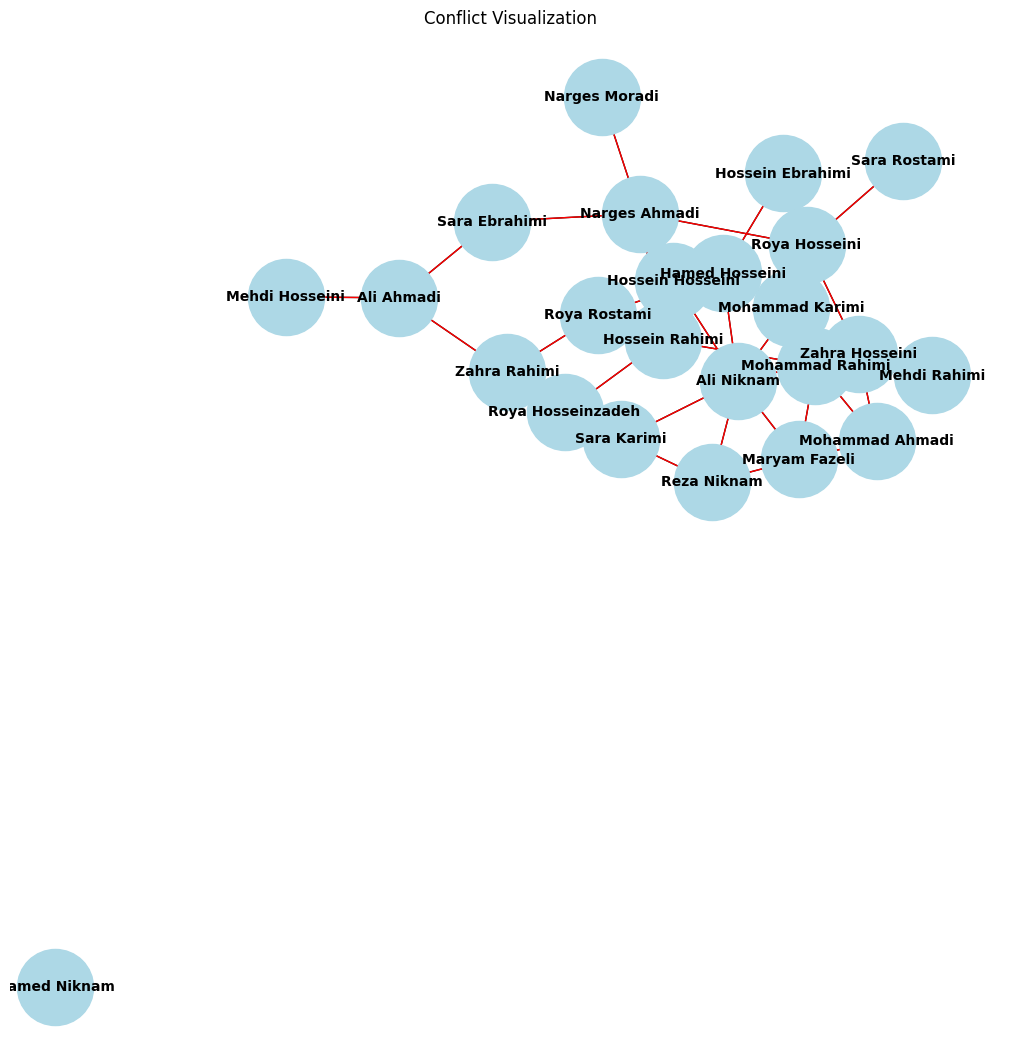

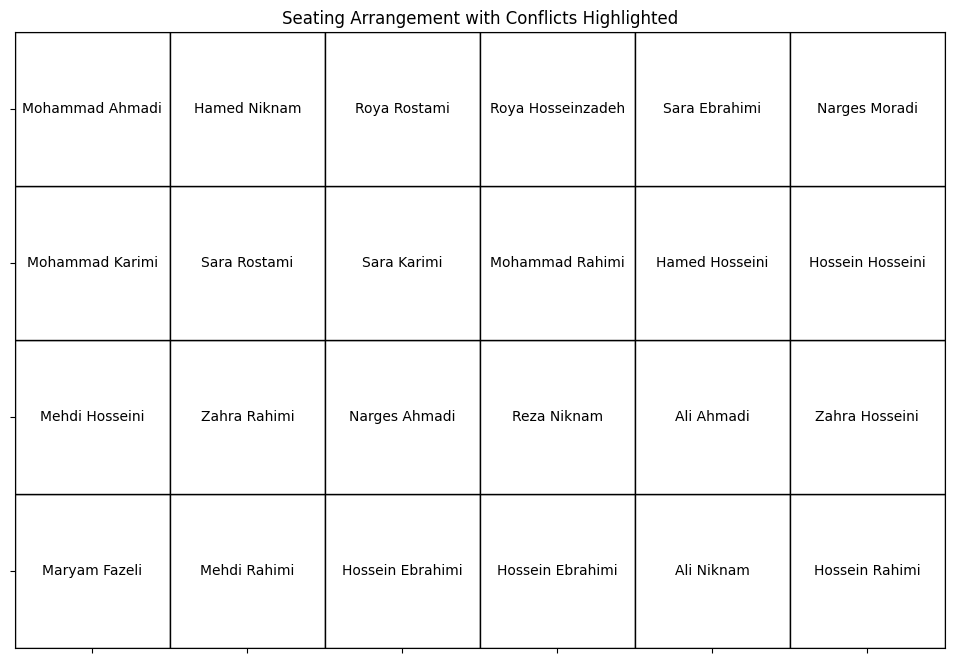

In [ ]:
conflict_matrix = conflict_matrices[0].squeeze(0).numpy()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [5, 22, 12, 6, 15, 19, 1, 16, 10, 21, 7, 18, 4, 8, 17, 23, 20, 2, 9, 13, 11, 3, 0, 14]


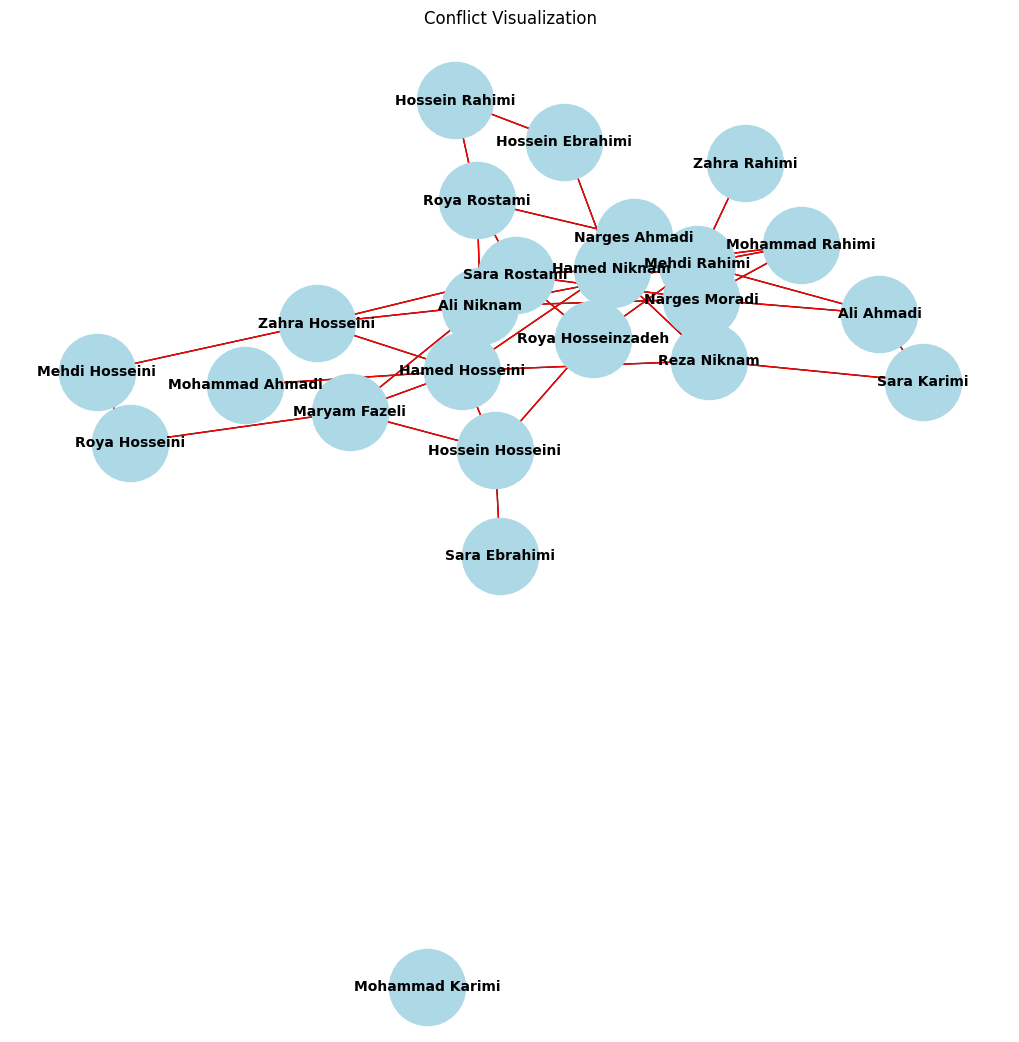

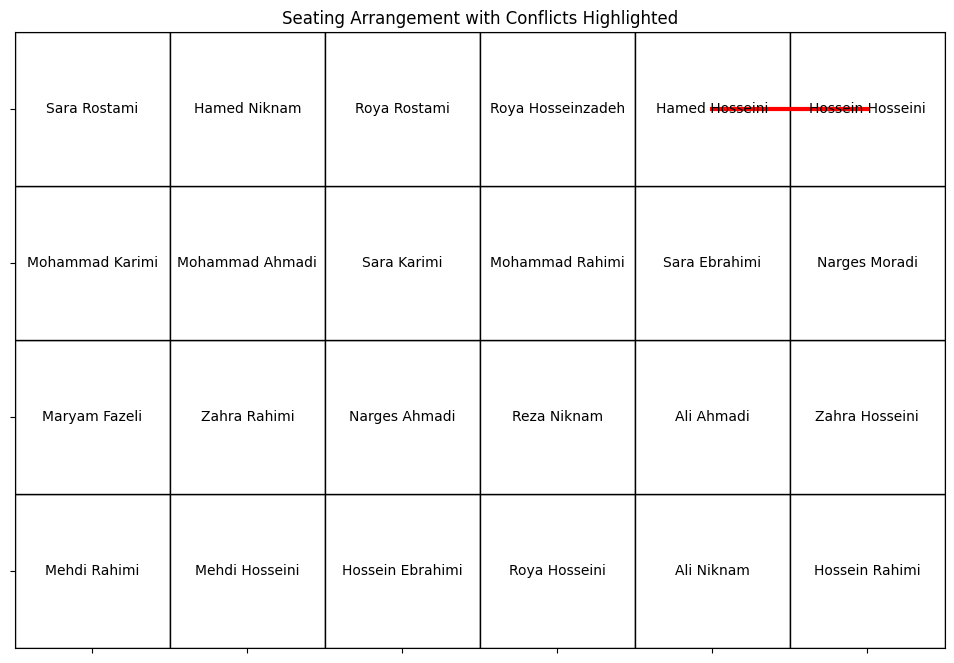

In [ ]:
conflict_matrix = conflict_matrices[100].squeeze(0).numpy()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [1, 5, 12, 6, 19, 8, 22, 10, 16, 21, 7, 18, 15, 9, 17, 23, 20, 14, 4, 13, 3, 11, 0, 2]


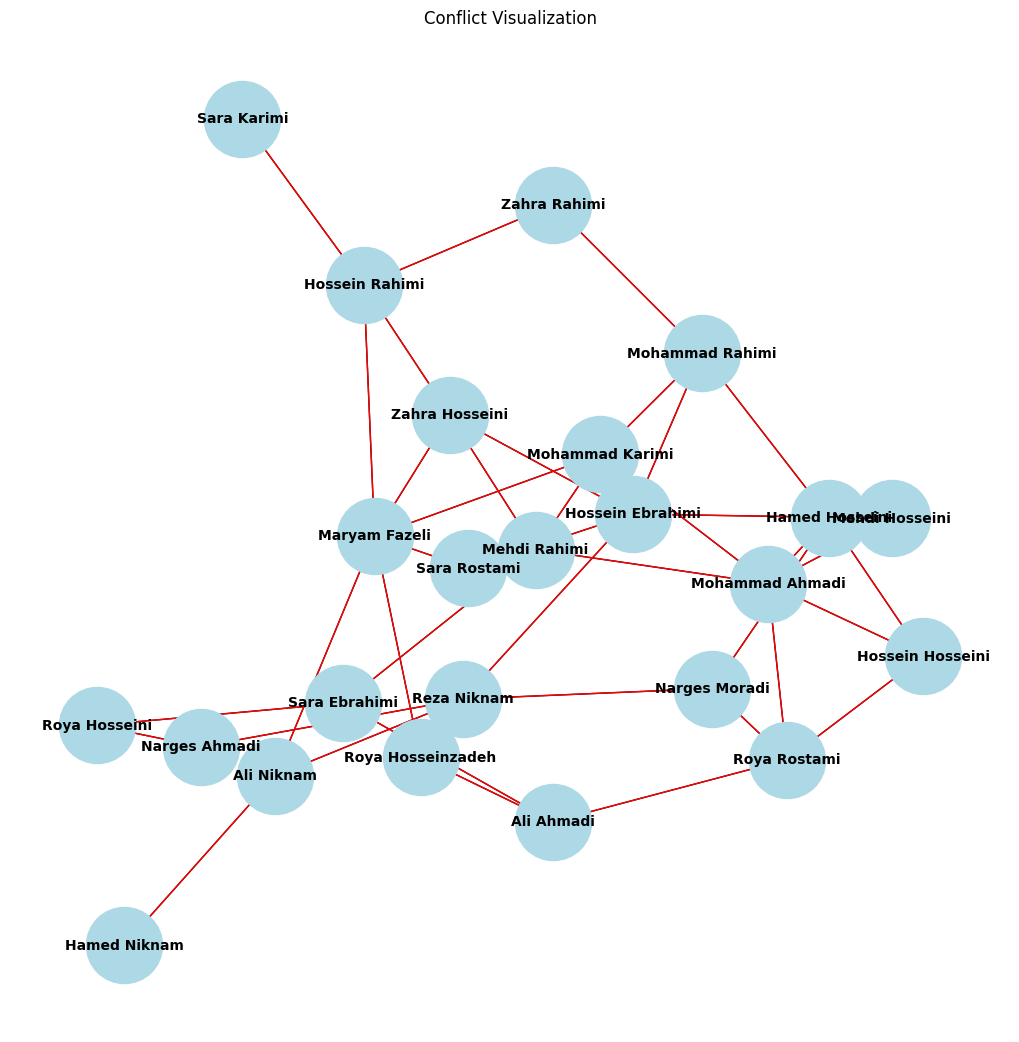

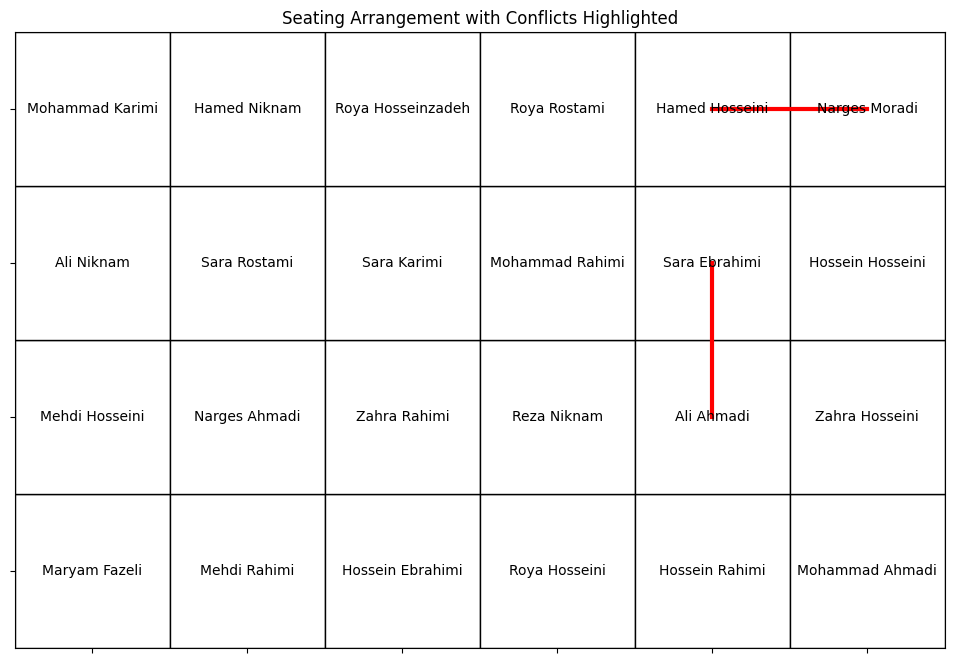

In [ ]:
conflict_matrix = conflict_matrices[500].squeeze(0).numpy()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [22, 5, 6, 12, 19, 15, 1, 16, 10, 21, 7, 18, 4, 8, 17, 23, 20, 2, 9, 11, 13, 3, 0, 14]


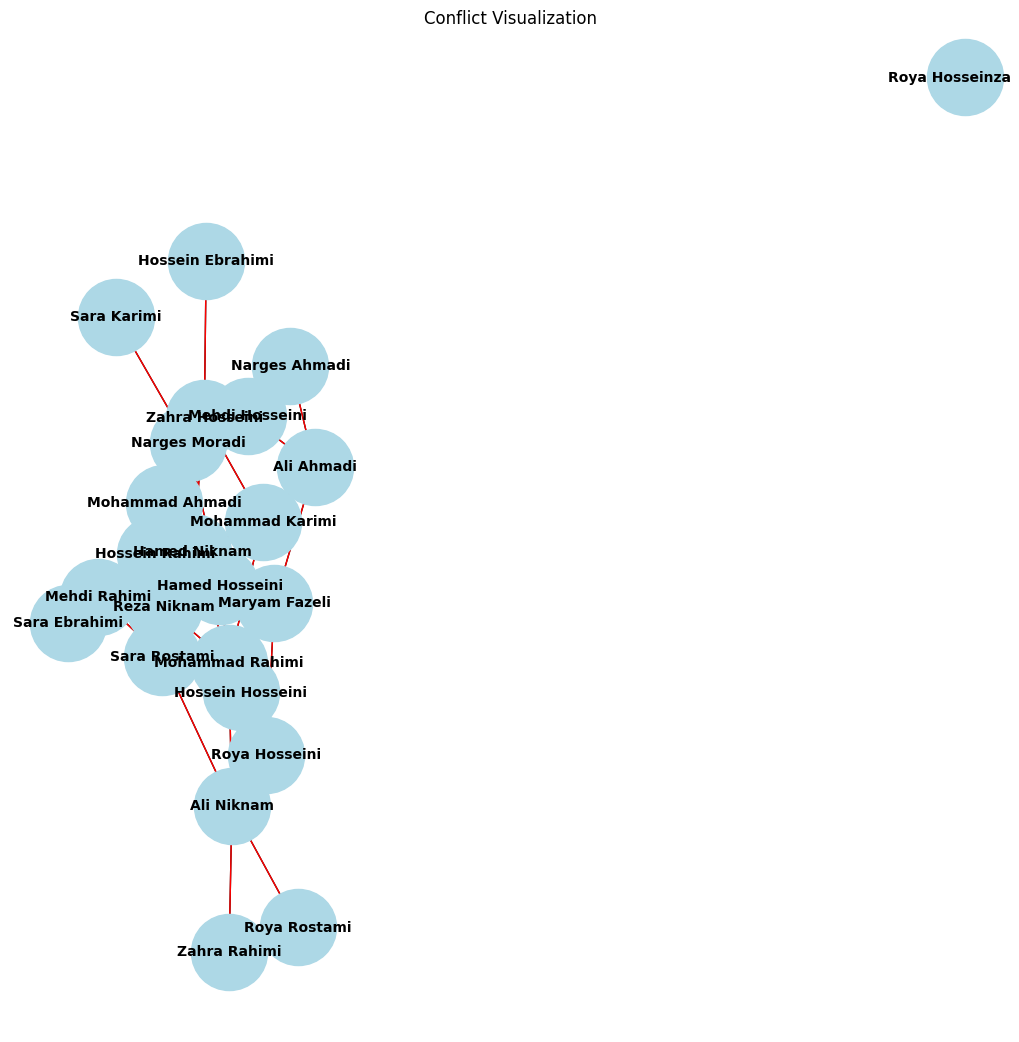

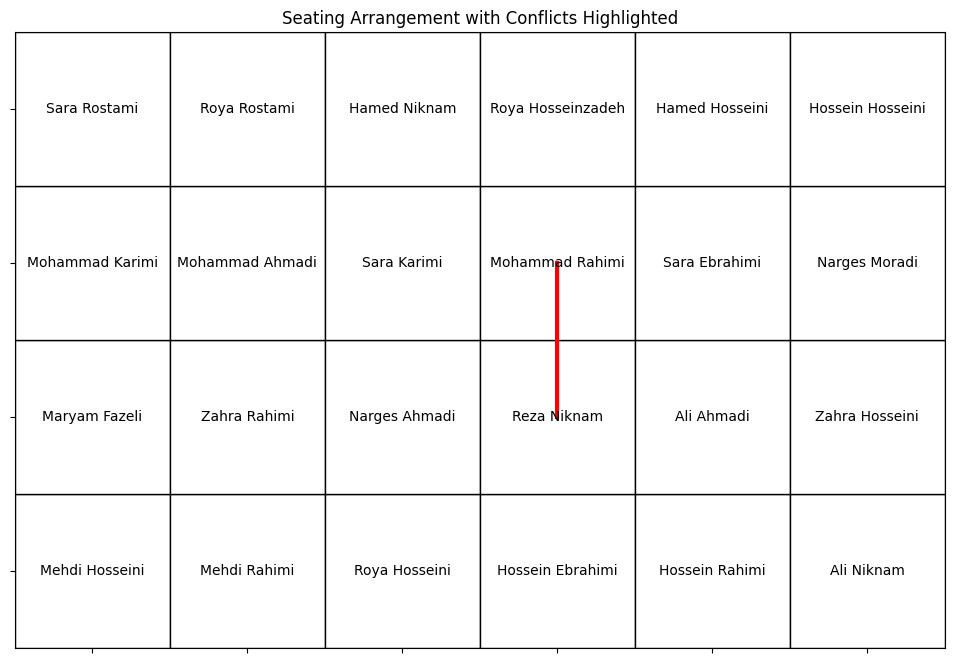

In [ ]:
conflict_matrix = conflict_matrices[1000].squeeze(0).numpy()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [22, 5, 12, 6, 15, 7, 1, 10, 16, 21, 18, 19, 4, 8, 17, 23, 0, 14, 9, 13, 3, 11, 20, 2]


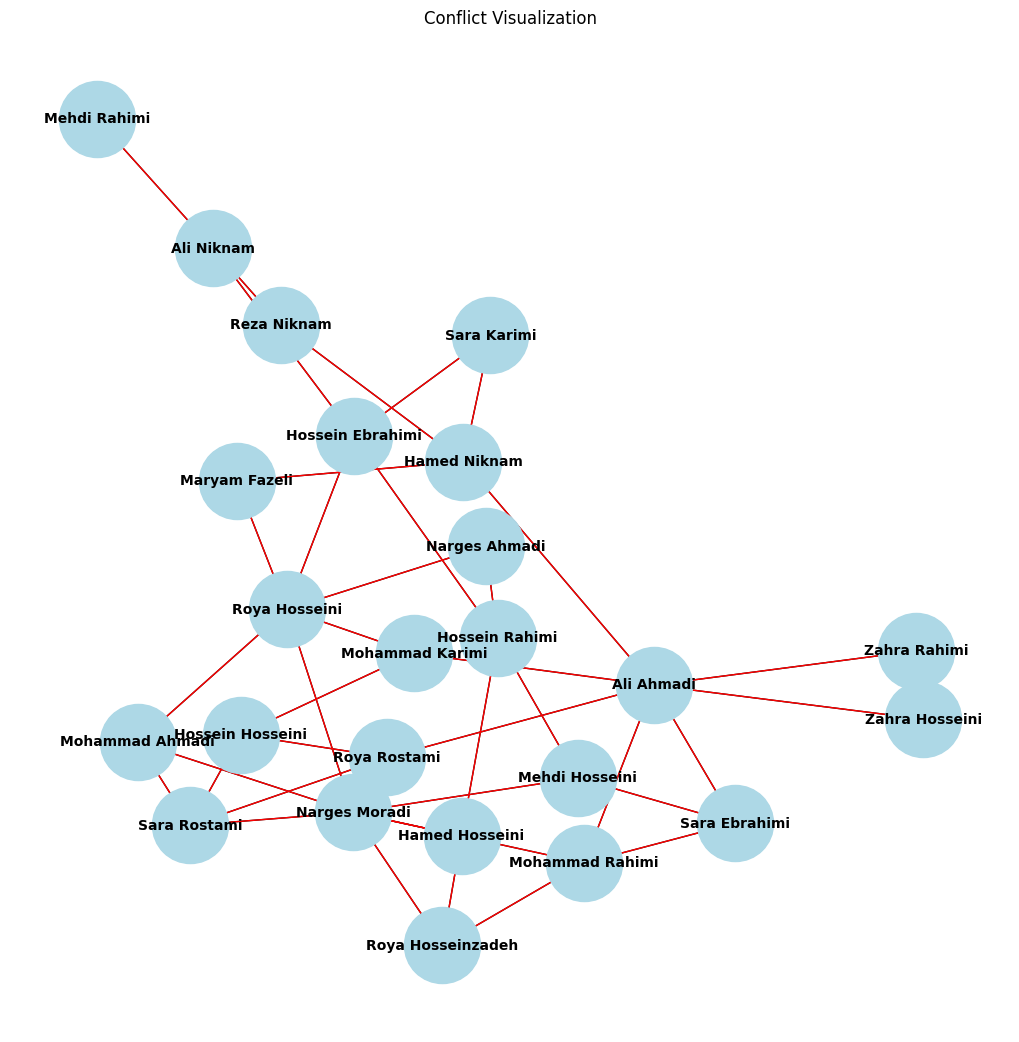

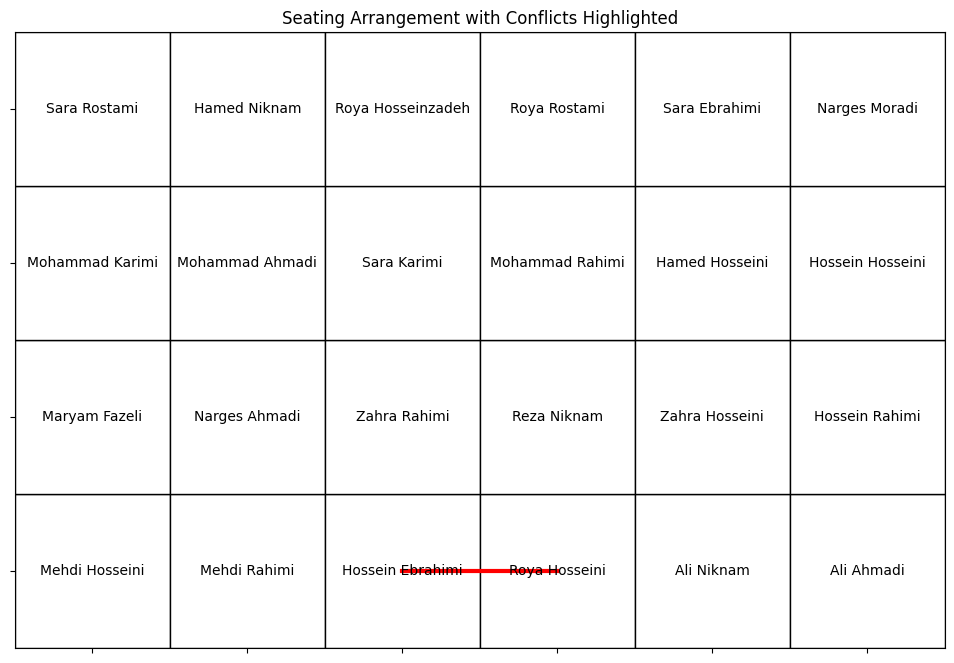

In [ ]:
conflict_matrix = conflict_matrices[1100].squeeze(0).numpy()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)

Generated Placement: [22, 5, 6, 12, 19, 15, 1, 10, 16, 21, 7, 18, 4, 9, 17, 23, 0, 2, 8, 13, 3, 11, 20, 14]


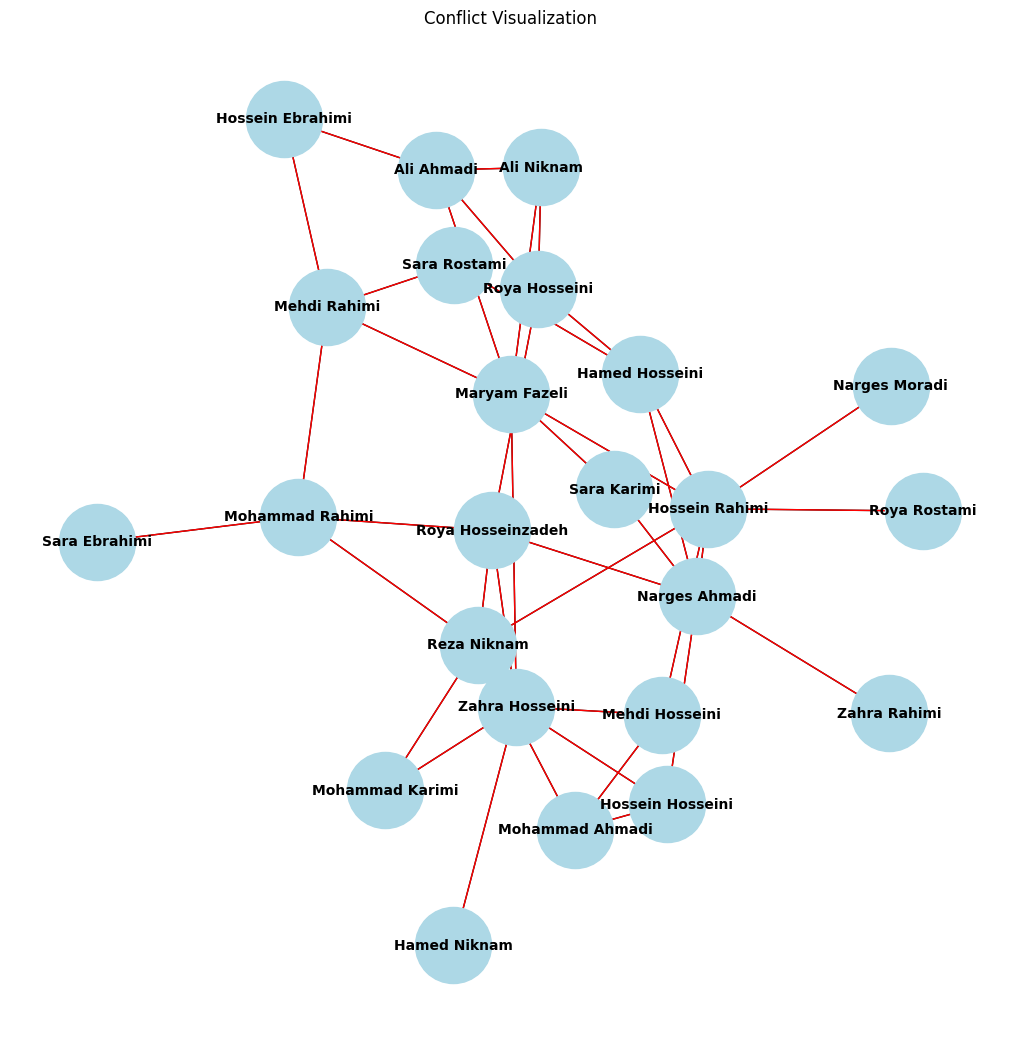

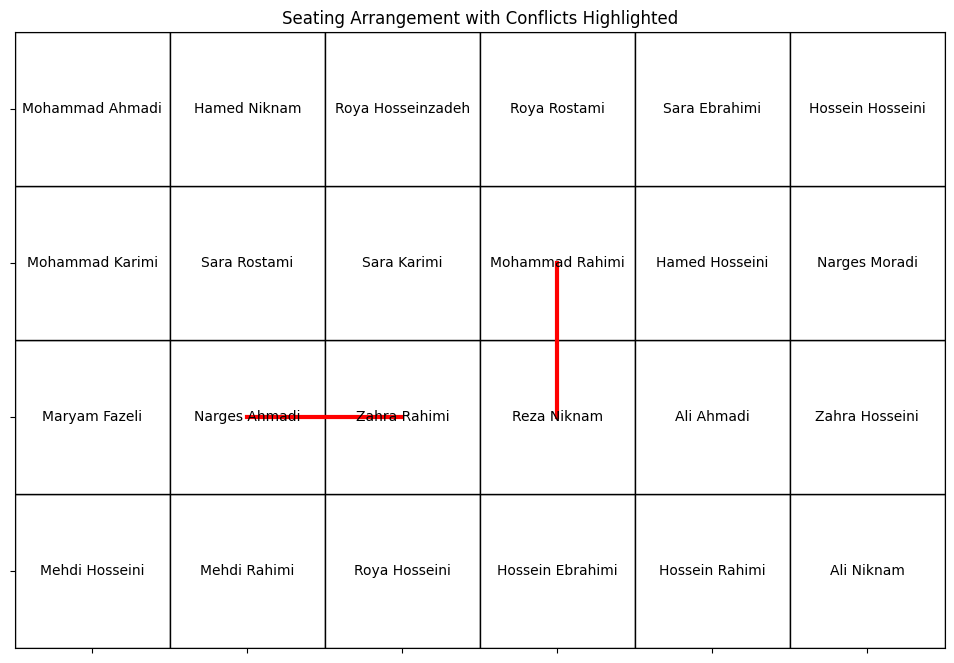

In [ ]:
conflict_matrix = conflict_matrices[1700].squeeze(0).numpy()
placement = generate_placement(model, conflict_matrix)
print("Generated Placement:", placement)
generate_and_visualize_placement(conflict_matrix, people, model)